# Поведение струны в заисимости от начальных условий

Все мы знаем, что струна будет подчнияться волновому уравнению
$$\begin{align}
    \frac{\partial^2 u}{\partial t^2} &= c^2 \frac{\partial^2 u}{\partial x^2}
 \end{align}$$ 

Введём k как отношение шага сетки времени к шагу сетки пространства, умноженное на то самое с. Распишем производные разностным отношением
 
$$\begin{align} 
\frac{u(t_{i-1},x_j)+u(t_{i+1},x_j)-2 u(t_{i},x_j)}{\tau ^2} = 
{c^2} \frac{u(t_{i},x_{j-1})+u(t_{i},x_{j+1})-2 u(t_{i},x_j)}{h^2} \newline
u(t_{i-1},x_j)+u(t_{i+1},x_j)-2 u(t_{i},x_j) = 
k^2 [u(t_{i},x_{j-1})+u(t_{i},x_{j+1})-2 u(t_{i},x_j)] \newline
u(t_{i+1},x_{j}) =k^2 u(t_{i},x_{j-1}) +k^2u(t_{i},x_{j+1})+ 2 (1-k^2) u(t_{i},x_{j}) - u(t_{i-1},x_{j}) 
\end{align}$$

In [1]:
import numpy as np
def struna (init, T, L, h = 1e-2, tau = 1e-2):
    k2 = (tau / h)**2
    u = np.zeros((np.int(T / tau), np.int(L / h)))
    u[0,:] = init(L, h)
    u[1,:] = u[0,:] 
    for i in range (1, np.int(T / tau) - 1):
        for j in range (1, np.int(L / h) - 1):
            u[i + 1, j] = k2 * u[i,j - 1] + k2 * u[i,j + 1] + 2 * (1 - k2) * u[i,j] - u[i - 1,j] 
    return u

 Возмём струну длиной пи и оттянем её на расстоянии e на единицу, просто потому что мы можем

In [2]:
def ya_mogu(L = np.pi, h = 1e-2):
    u = np.zeros(np.int(L / h))
    for i in range (np.int(L / h)):
        if i * h < np.e:
            u[i] = i * h / np.e
        else:
            u[i] =  (np.pi - i * h) / (np.pi - np.e)
    return u
u = struna (ya_mogu, 2, np.pi)

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\ffmpeg\\bin\\ffmpeg'

def video(u):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set(xlim=(0, np.pi * 100), ylim=(-1.2, 1.2))
    line = ax.plot(u[0, :], color='k', lw=2)[0]
    def animate(i):
        line.set_ydata(u[i, :])

    anim = FuncAnimation(
        fig, animate, interval=100, frames=u.shape[0] - 1)
    return anim


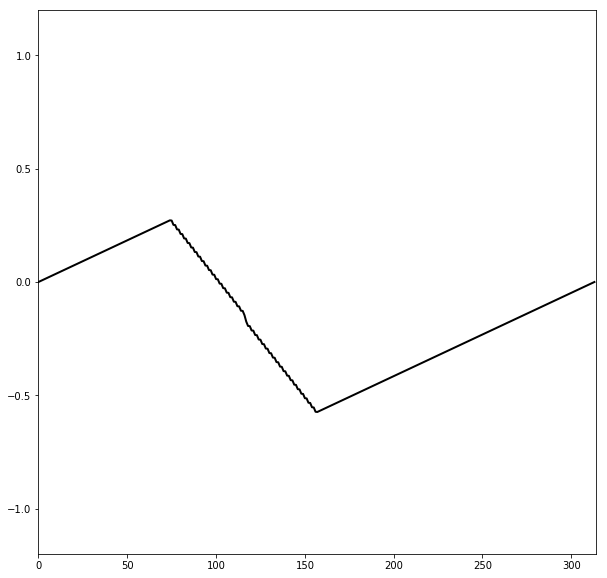

In [4]:
HTML(video(u).to_html5_video())

Теперь запустим туда синус странную сумму синусов

In [5]:
def sinus(L = np.pi, h = 1e-2):
    u = np.zeros(np.int(L / h))
    for i in range (np.int(L / h)):
        u[i] =  np.sin(20 * h * i) + 0.5 * np.sin(40 * h * i) + 0.3 * np.sin(10 * h * i)
    return u
u = struna (sinus, 2, np.pi)

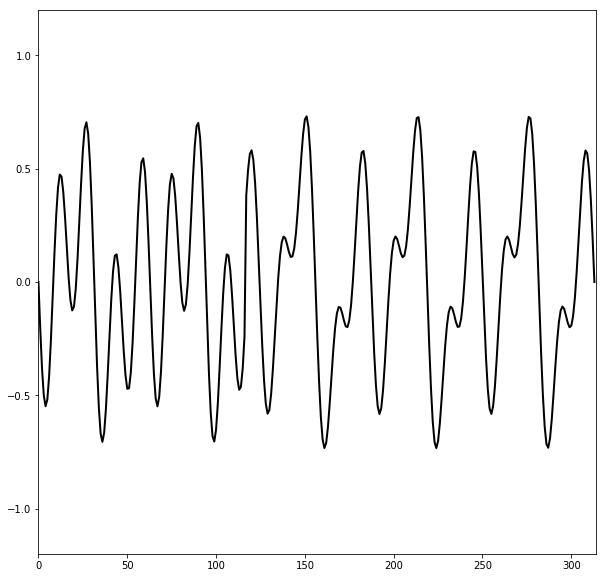

In [6]:
HTML(video(u).to_html5_video())

Как видим, синусы там и остатся, менее странными не становятся